# Traffic Sign Classification - LeNet Deep Network

### by ReDay Zarra

This project utilizes the **LeNet deep network architecture** to classify 43 different types of traffic signs. LeNet refers to a convolutional neural network that can be used for computer vision and classification models. This project showcases a *step-by-step implementation* of the model as well as *in-depth notes* to customize the model further for higher accuracy.

## Importing the necessary libraries

In [228]:
import pandas as pd
import numpy as np

> Classic libraries that will help us read and analyze data

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

> Libraries used for plotting and data visualization

In [230]:
import pickle

> Using pickle package to open our data, not much use after that

## Importing the dataset

Importing the data into three different sections: training, validation, and
testing. **Training data is used to train** the network, **testing data is used to test**
the trained network with data that it has never seen to see how it would perform in
the real world. The **validation dataset ensures that we avoid overfitting** by showing
the network validation data every epoch (or run) in a process called 
cross-validation to ensure that the network is not focusing on the details of the
training data. 

In [231]:
with open("./traffic-signs-data/train.p", mode = 'rb') as training_data:
    train = pickle.load(training_data)

In [232]:
with open("./traffic-signs-data/valid.p", mode = 'rb') as validation_data:
    valid = pickle.load(validation_data)

In [233]:
with open("./traffic-signs-data/test.p", mode = 'rb') as testing_data:
    test = pickle.load(testing_data)

### Splitting the dataset into training and testing sets

Splitting the data into our individual training, validation, and testing set variables.

In [234]:
X_train, y_train = train['features'], train['labels']

> Assigning the features of the training set as X_train and the dependent variable (labels) as y_train

In [235]:
X_validation, y_validation = valid['features'], valid['labels']

> Assigning the features of the validation set as X_validation and the dependent variable (labels) as y_validation

In [236]:
X_test, y_test = test['features'], test['labels']

> Assigning the features of the testing set as X_test and the dependent variable (labels) as y_test

### Checking the dimensions of the datasets

In [237]:
X_train.shape

(34799, 32, 32, 3)

> Gives us an output of a four element tuple. The first number is the quantity of images, the second is the width of image in pixels, the third is the height of the image, and the last number the depth - in this case the 3 tells us that the images are colored since they are being multiplied for both Red, Green, and Blue

In [238]:
y_train.shape

(34799,)

> Gives us a tuple of one element, which is a label for each image in the training set

In [239]:
X_validation.shape

(4410, 32, 32, 3)

> A smaller subset only containing 4410 pictures, which are 32 x 32, and have a depth of 3 meaning they are colored with RGB

In [240]:
X_test.shape

(12630, 32, 32, 3)

In [241]:
y_test.shape

(12630,)

## Verifying the images from the dataset

Using matplotlib to display a randomly choosen image and see if it matches with its label, just to see what the images are and how the network will be classifying them. Each type of sign has its own class which will identify the type of sign to the model. 

In [242]:
i = 23 

> The index of the image we want to look at, arbitrarily chose 23

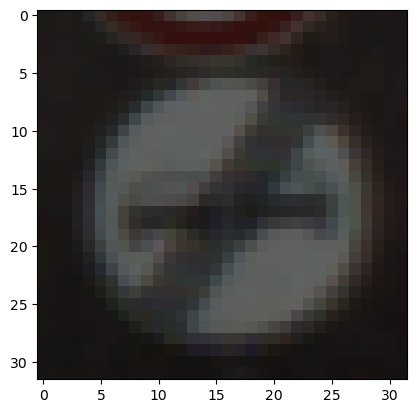

In [243]:
plt.imshow(X_train[i])

> Using matplotlib's .imshow method to show an image from the features training set at the index of 23

In [244]:
y_train[i]

41

 >Also show us the corresponding label from the same index in the label's training set - the label tells us that the sign is a "End of No Passing"

41

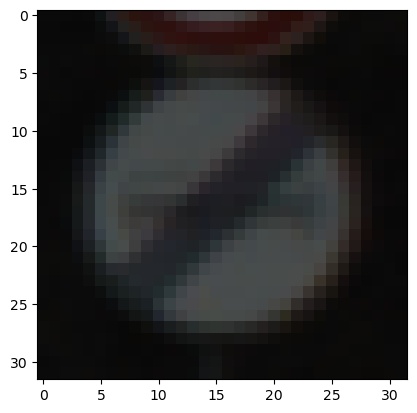

In [245]:
plt.imshow(X_validation[i])
y_validation[i]

>Verifying images for the validation dataset

3

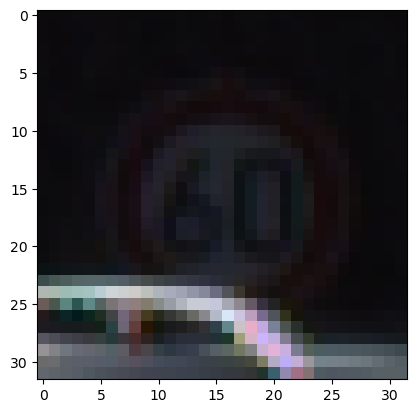

In [246]:
plt.imshow(X_test[i])
y_test[i]

> Verifying images for the testing dataset

## Preparing the data 

Preparing the data by **transforming the images so they are simpler for the network to understand**. Such as 
transforming the images from **RBG to grayscale (changes the depth from 3 to 1)**. I 
will also **perform data normalization**, where instead of using the pixel values 
ranging from 0 to 255, we can lower the range to use a more restricted range of
pixel values. The **data needs to also be shuffled** so the images do not get trained
in a certain order, we do not want the network to learn the order of these images.
We want to make it as hard as possible for the network to learn, which is why we
use low-quality images, more restricted pixel range, and grayscale images. 

### Shuffling the dataset

In [247]:
from sklearn.utils import shuffle

> Importing the shuffle module from the sci-kit learn library to shuffle the dataset first

In [248]:
X_train, y_train = shuffle(X_train, y_train)

> Used the shuffle function to reassign the variables of X_train and y_train into a different order, however the labels still correspond to the correct images because the shuffle function reorders them the same way

### Transforming the data from RBG to Grayscale

In [249]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)

> Use numpy to average the pixels to get the grayscale version of the image. We will simply add the pixel values from the three color channels (Red, Green, and Blue) and then divide them by 3. 

In [250]:
X_train_gray.shape

(34799, 32, 32, 1)

> The depth of the features training set is no longer 3, its now 1. This means the images are now grayscale

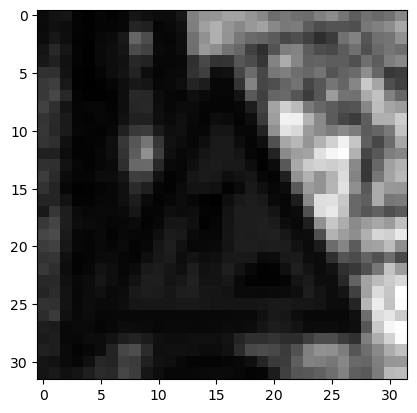

In [251]:
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')

> The .squeeze() method gets rid of the 1 (last number) at the end of our tuple when we call the .shape method. This is because the 1 represented the depth of each image, but because our images are now grayscale we no longer need to include that. We are also specifying that we want our colormap, or cmap, to be in grayscale so we give it the 'gray' value.

In [252]:
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)
X_validation_gray.shape

(4410, 32, 32, 1)

> Averaging the RGB values to reduce the depth from 3 to 1 for the feature's validation set

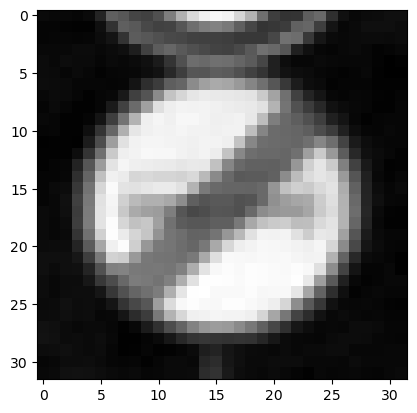

In [253]:
plt.imshow(X_validation_gray[i].squeeze(), cmap = 'gray')

> Grayscale sample image from the feature's validation set

In [254]:
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_test_gray.shape

(12630, 32, 32, 1)

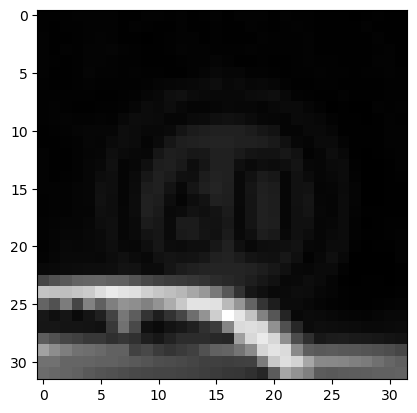

In [255]:
plt.imshow(X_test_gray[i].squeeze(), cmap = 'gray')

### Normalizing the data 

**Normalization is restricting the pixel value scale for each dataset**. It is important because we want all our **pixels in a similar range** so the weight at one part of the image is not a lot more than the weight at another part of an image.

In [256]:
X_train_gray_norm = (X_train_gray - 128) / 128

> There are many kinds of normalization methods. This one works by **subtracting the image pixels by 128** because we want to center the data from its range of 0 to 255 (256 total, so half is 128). We then **divide by 128** to so the data is between -1 to 1.

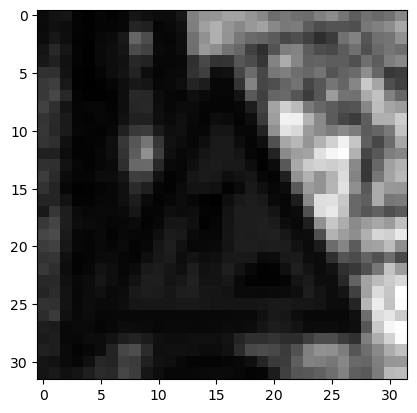

In [257]:
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')
# X_train_gray_norm

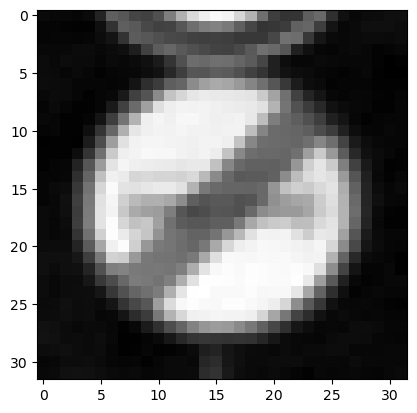

In [258]:
X_validation_gray_norm = (X_validation_gray - 128) / 128
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap = 'gray')

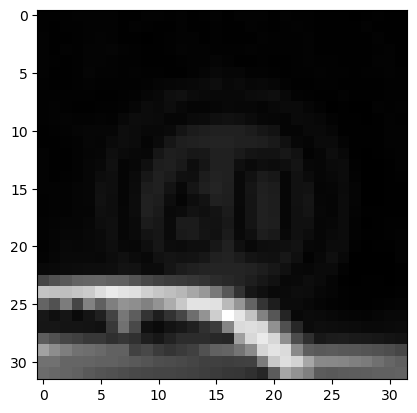

In [259]:
X_test_gray_norm = (X_test_gray - 128) / 128
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'gray')

## Building the Neural Network

To train the model we will implement six fundamental steps that will ensure we have
correctly implemented the LeNet-5 architecture. The original LeNet-5 architecture
was proposed by Yann LeCun and he developed it to recognize handwritten numbers. 
The dataset with the handwritten numbers is called the MNIST dataset and we will
be working with that in some different project. 

For our use, we will need to cutomize the LeNet architecture a bit because we have
more classes (or types of things) to differentiate from. Yann LeCun had 10 classes 
which were numbers ranging from 0 to 1, while we have over 43 different traffic 
signs. 

### First Convolutional Layer

For our first step, we will take our input image (which is 32 x 32 x 1) and **apply
6 filters** that are 5 x 5 with input depth of 3. The output of these filters will be 
28 x 28 x 6 after the image has been processed through it. This is because there is 
an equation the ouptut has to follow that applies when we run images to filters: 

> **Output = ((Input - Filter) + 1) / Stride**

the equation above returns 28 by: 

> **Output = ((32 - 5) + 1) / 1 = 28**

The **stride is simply how much the kernel is shifted by each time when it passes over the image.** The kernel is essentially a feature map that scans the image by essentially gliding over it. The stride is how much the kernel shifts, so a **stride of 1 means that the kernel is moving 1px at a time** which is slow. While a stride of 2 means its moving 2px each time.

The **output depth is determined by the number of filters we apply**, since we applied
six filters the output of the image after the filters have been applied becomes
28 x 28 x 6.

Then we need to **apply a ReLU function on the output**. The rectified linear 
unit, or ReLU, an activation function simply takes in input and **converts all negative numbers 
into 0's while maintaining all the positive numbers**.

Finally, a **pooling layer (or subsampling layer) will be applied to simply shrink 
the feature map by 2**. This means the output depth will remain the same (the output
from the filters is still maintained), however the size of the output will be 
divided from 28 to 14. The result of the pooling layer is 14 x 14 x 6.

#### Importing the Keras classes

In [260]:
from keras.models import Sequential

> We are going to use **Keras which will sit on top of TensorFlow** and help us build our network. From the keras.models module we will import the Sequential class which will allow us to **build our network in a sequential fashion (building it one step at a time)**.

In [261]:
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout

> Import the following **necessary classes from Keras to build our model** sequentially:

> 1. The **Conv2D** class will be used to **perform our convolutions in the convolutional layers**.

> 2. The **MaxPooling2D** class is going to help us in the **downsampling layers by selecting the largest pixel value** in the pooling window.

> 3. The **AveragePooling2D** class will also perform **downsampling but it will take the average of the pixels** in the pooling window. 

> 4. The **Dense** class helps **build the dense layers**. 

> 5. The **Flatten** class will help us **flatten the matrix down to a vector** of pixels. 

> 6. The **Dropout** class is implements a regularization technique that **reduces overfitting by forcing some of the neurons to have an input of zero** - which reduces dependency on any one feature.

In [262]:
from keras.optimizers import Adam

>The **Adam** class is optimization algorithm **used to update the weights of the neural network**. Adam maintains a running average of the gradients and uses them to update the model.

In [263]:
from keras.callbacks import TensorBoard

> Basically using TensorFlow as the backend of the Keras API

#### Applying the First Convolution

In [264]:
cnn_model = Sequential()

> Create the Sequential class instance object

In [265]:
cnn_model.add(Conv2D(filters = 6, kernel_size = (5, 5), activation = 'relu', input_shape = (32, 32, 1)))

> Use the Sequential class .add method to start building. The **Conv2D is class is then called to build the first convolution layer**, it takes 4 parameters. The first parameter is the number of filters which we know is 6. The **kernel_size is the size of the filters** which we know is 5 x 5 so we input the tuple (5,5). We specify the **activation function as 'relu'** to ensure ReLU is used. The final parameter is the **input shape which will be the shape of the image** so the tuple (32, 32, 1)

#### Applying Pooling

In [266]:
cnn_model.add(AveragePooling2D())

> Using the .add method from the Sequential class, call the AveragePooling2D class which will automatically apply average downsampling (average pixel value is chosen from pooling window) to our output. This means our output will go from (28, 28, 6) to (14, 14, 6). It will divide the image shape by 2 but will not affect the output depth. 

### Second Convolutional Layer

For our second step, we will simply repeat the process above but implementing some slight changes. We will take the output from the previous convolutional layer, which was 14 x 14 x 6 and then **apply 16 filters**. The filters will follow the same equation from above:

> **Output = ((14-5) + 1) / 1 = 10**

The **stride is 1px** (kernel is shifting by 1px each time) and because we have applied 16 filters, the **output of the filters will be 10 x 10 x 16**.

Similar to the previous layer, we **apply a ReLU funciton** which will simply *convert all the negative values into 0's*.

A subsampling layer aka **pooling layer is applied** to reduce the size of the images by 2. Meaning the images are shrunk down from 10 x 10 to 5 x 5, however the output depth from the filters has not changed. This means that the **output after the second convolutional layer is 5 x 5 x 16**.

#### Applying the Second Convolution

In [267]:
cnn_model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))

> Similar to the last filter except we no longer have to specify the input shape because the model already accepted the input from the last layer

In [268]:
cnn_model.add(AveragePooling2D())

### Flatten Layer

The **flatten layer is simply used to convert** our matrix of data, which in our case is 5 x 5 x 16 **into a single array** so 400 x 1. This array *basically stores the individual pixels of an image in a single line*. It is important to flatten our data because the fully connected layers expects a one-dimensional vector of data as input. 

In [269]:
cnn_model.add(Flatten())

> Call the Flatten class to automatically flatten the output from the last convolutional layer into a vector of 400 x 1 containing pixels

### First Dense Layer

A fully connected layer or a **dense layer is simply a layer that connects all of the
nodes from it's layer to all of the nodes in the next layer**. Dense layers are often
used at the end of neural networks because they *allow the network to learn the 
complex mapping from the input to the output data*. They function by receiving 
input from all of the nodes and then multiplying weights and adding biases to each
input value. These values are then passed down to the next dense layer which adds 
its own weights and biases. The **network learns to control these weights and biases
so that it can eventually make highly accurate predictions**.

In our case, the **first dense layer will have 400 nodes** which will each be assigned a 
pixel from our 400 x 1 flattened vector. The nodes will then connect to a second 
layer which only has 120 nodes (or neurons). The **dense layer will then apply a ReLU activation function to the output** before sending it off to the next layer.

In [270]:
cnn_model.add(Dense(units = 120, activation = 'relu'))

> Use the .add method from the Sequential class, and then call the Dense class. This class takes the parameters units which is the number of nodes it needs to connect to for the next layer, and then the activation function which is ReLU

### Second Dense Layer

The second dense layer is similar to the first. It will **take the input from the 120 nodes** from the previous layer, **manipulate the input with its own weights & biases, and then pass on the output to the next layer**.

The second dense layer will have 120 nodes to recieve the input from the previous layer and then it's output will be passed on to another dense layer with 84 nodes. The dense layer will then **apply a ReLU activation function to the output** before sending it off to the next layer.

In [271]:
cnn_model.add(Dense(units = 84, activation = 'relu'))

### Third Dense Layer

The third and **final dense layer will recieve input from the previous layer with its 84 nodes**. This layer will be **responsible for manipulating the input recieved and sending it to the final output layer**. The dense layer will then **apply a ReLU activation function to the output** before sending it off to the output layer.

Our **output layer needs to have nodes equal to the number of classes**. In the MNIST experiment, Yann LeCun only had 10 classes because he was trying to recognize the handwritten digits 0 to 9. However, we are trying to classify 43 different kinds of signs so our **output layer needs to have 43 nodes**. One node for class, or type of sign. 

In [272]:
cnn_model.add(Dense(units = 43, activation = 'softmax'))

> The activation function of the last layer **can't use ReLU because the output needs to be categorical** (ReLU just gives us numbers that aren't negatives). The **softmax activation function takes in all the input and squashes it between 0 and 1**, meaning the final values of all the numbers add up to 1. **These numbers between 0 and 1 act as probability values** (if you multiply by 100 you get the percentage) which is perfect for our project.

## Compiling the Model

To train the model, we will **first have to compile it**. We will use the .compile 
method from the Sequential class. The method accepts the following classes which
are used to compile and train the model effeciently: **loss, optimizer, and metrics**.

In [273]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])

> 1. The loss parameter allows us to specify what kind of loss function we want to use to better train the model. The categorical cross entropy loss function measures the difference between the true probability distribution and predicted probability distribution.
>> The loss function does this by comparing the predicted probability for each class with the true class label

> 2. The optimizer parameter will specify what kind of optimizer we want to use. For my project, I want to use the Adam optimizer. The Adam optimizer takes in the parameter learning_rate which is set to 0.001 - this is the step size at which the optimizer makes updates to the parameters (weights and biases).
>> The learning rate of 0.001 is good for Adam. However, if the learning rate is too small than the model can be train too slow. If it is too big than the model can speed up the training process but increase the risk of overfitting.

> 3. The metrics parameter lets us specify how we want to evaluate the model. The accuracy metric allows us to evaluate the performance of the model based on the number of correct predictions divided by the total predictions.

## Training the Model

Finally, to train the model we will use the .fit method from the Sequential class. This class has a number of parameters that we will need to address for the network to train effeciently, such as: **features training** dataset, **dependent variable training** dataset, **batch_size, nb_epoch, verbose, validation_data**.

In [274]:
history = cnn_model.fit(X_train_gray_norm,
              y_train,
              batch_size = 500,
              epochs = 45,
              verbose = 1,
              validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/45
70/70 [==============================] - 3s 45ms/step - loss: 3.0740 - accuracy: 0.2160 - val_loss: 2.3989 - val_accuracy: 0.3515
Epoch 2/45
70/70 [==============================] - 3s 44ms/step - loss: 1.4447 - accuracy: 0.5961 - val_loss: 1.2297 - val_accuracy: 0.6279
Epoch 3/45
70/70 [==============================] - 3s 44ms/step - loss: 0.8250 - accuracy: 0.7689 - val_loss: 0.9237 - val_accuracy: 0.7263
Epoch 4/45
70/70 [==============================] - 3s 44ms/step - loss: 0.6088 - accuracy: 0.8324 - val_loss: 0.7595 - val_accuracy: 0.7789
Epoch 5/45
70/70 [==============================] - 3s 44ms/step - loss: 0.4921 - accuracy: 0.8665 - val_loss: 0.7310 - val_accuracy: 0.7771
Epoch 6/45
70/70 [==============================] - 3s 44ms/step - loss: 0.4152 - accuracy: 0.8886 - val_loss: 0.6348 - val_accuracy: 0.8181
Epoch 7/45
70/70 [==============================] - 3s 44ms/step - loss: 0.3497 - accuracy: 0.9099 - val_loss: 0.6115 - val_accuracy: 0.8288
Epoch 8/45
70

> 1. The first parameter of the .fit method is the features training dataset. Here we will just **input the features training data** which are the images that we prepared by shuffling, grayscaling, and normalizing. The images are **stored in the variable X_train_gray_norm**

> 2. The second parameter is the dependent varible training dataset (what we want to predict). We can just **input the dependent variable training data** which are the labels that correspond to every image in the features training data. These labels are **stored in the variable y_train**

> 3. The third parameter is the **batch_size** with just **means the number of images that will be fed into the network at once**.

> 4. The fourth parameter is the **epochs** which **means the number of epochs or a single pass through the *entire dataset***. At the end of each epoch, the model's performance is evaluated and recorded. Another epoch starts and the **optimizer aims to perform better each time** using the evaluations. 

> 5. The fifth parameter is **verbose** which just means how much information the program shows us during the training process. Setting the **value to 1 will show us all the background information, and the value will 0 will show us nothing**.

> 6. The sixth parameter is the **validation_data**. This is the dataset we will **use to avoid overfitting by showing the network validation data every epoch** so that the network is not focusing on the details of the training data. The **validation images are stored in the variable X_validation_gray_norm** and the **validation labels are stored in the variable y_validation**

## Evaluating the Model

Now that we have trained our model, it **needs to be evaluated so we know how well it performs in the real world**. This can be done by **showing the model the testing dataset** which it has not seen before.

### Testing the Model

In [276]:
score = cnn_model.evaluate(X_test_gray_norm, y_test)

395/395 [==============================] - 1s 2ms/step - loss: 1.0775 - accuracy: 0.8773


> Using the .evaluate method from the Sequential class that allows us to evaluate the model on the testing sets. The features testing set or the **testing images are stored in the variable X_test_gray_norm** and the **labels are stored in y_test**.

In [292]:
print(score)

[1.0775251388549805, 0.8772763013839722]


In [302]:
print("Test Accuracy: {}%".format(round(score[1] * 100, 2)))

Test Accuracy: 87.73%


### Visualizing Accuracy

In [278]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

> The history variable is calling on the .history method which produces a dictionary containing the **keys: loss, accuracy, val_loss, val_accuracy** which **store values about the all the accuracy and losses** for training and validation data for every epoch.

In [282]:
accuracy = history.history['accuracy']

## 